In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Linear Regression - R2 Score: 0.67
Polynomial Regression (degree=2) - R2 Score: 0.92
Support Vector Regression - R2 Score: -0.18
Decision Tree Regression - R2 Score: 1.00

Best Model: Decision Tree Regression (Highest R2 Score: 1.00


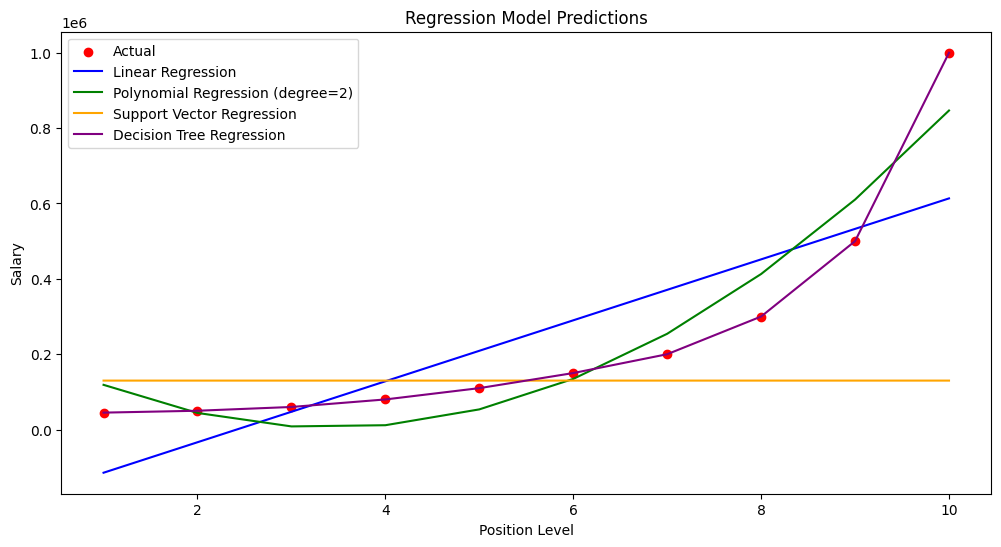

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Fit Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X, y)
y_pred_linear = linear_reg.predict(X)
r2_linear = r2_score(y, y_pred_linear)

# Fit Polynomial Regression (degree=2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
y_pred_poly = poly_reg.predict(X_poly)
r2_poly = r2_score(y, y_pred_poly)

# Fit Support Vector Regression
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X, y)
y_pred_svr = svr_reg.predict(X)
r2_svr = r2_score(y, y_pred_svr)

# Fit Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X, y)
y_pred_tree = tree_reg.predict(X)
r2_tree = r2_score(y, y_pred_tree)

# Model comparison
# Print R2 values
print(f"Linear Regression - R2 Score: {r2_linear:.2f}")
print(f"Polynomial Regression (degree=2) - R2 Score: {r2_poly:.2f}")
print(f"Support Vector Regression - R2 Score: {r2_svr:.2f}")
print(f"Decision Tree Regression - R2 Score: {r2_tree:.2f}")

# Find the best model
models = ["Linear Regression", "Polynomial Regression", "Support Vector Regression", "Decision Tree Regression"]
best_model_name = models[np.argmax([r2_linear, r2_poly, r2_svr, r2_tree])]
best_r2 = max([r2_linear, r2_poly, r2_svr, r2_tree])

print(f"\nBest Model: {best_model_name} (Highest R2 Score: {best_r2:.2f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='red', label='Actual')

# Plot all models' predictions
plt.plot(X, y_pred_linear, color='blue', label='Linear Regression')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Regression (degree=2)')
plt.plot(X, y_pred_svr, color='orange', label='Support Vector Regression')
plt.plot(X, y_pred_tree, color='purple', label='Decision Tree Regression')

plt.title('Regression Model Predictions')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

plt.show()
